In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
# Importing the data from the previous part and renaming columns so the merge names will be clearer
bike_stations = pd.read_csv('../data/toronto_bike_stations.csv', index_col=0)
fs_data = pd.read_pickle('../data/fs_final_data.pkl')
yelp_data = pd.read_pickle('../data/yelp_final_data.pkl')

bike_stations = bike_stations.rename(columns={'id': 'station_id', 'name':'station_name', 'latitude':'station_latitude', 'longitude':'station_longitude'})
fs_data = fs_data.rename(columns={'name':'PoI_name', 'latitude':'PoI_latitude', 'longitude':'PoI_longitude'})
yelp_data = yelp_data.rename(columns={'name':'PoI_name', 'latitude':'PoI_latitude', 'longitude':'PoI_longitude'})

In [3]:
fs_bikes = pd.merge(bike_stations, fs_data, how='outer', on='station_id')
yelp_bikes = pd.merge(bike_stations, yelp_data, how='outer', on='station_id')

In [4]:
# Creating a pickle for each dataframe to import for the next part
fs_bikes.to_pickle('../data/fs_bikes.pkl')
yelp_bikes.to_pickle('../data/yelp_bikes.pkl')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

#### FourSquare

In [5]:
fs_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   station_id         8640 non-null   object  
 1   station_name       8640 non-null   object  
 2   station_latitude   8640 non-null   float64 
 3   station_longitude  8640 non-null   float64 
 4   number_of_bikes    8640 non-null   int64   
 5   fsq_id             8640 non-null   object  
 6   distance           8640 non-null   int64   
 7   PoI_name           8640 non-null   object  
 8   PoI_latitude       8640 non-null   float64 
 9   PoI_longitude      8640 non-null   float64 
 10  address            8389 non-null   object  
 11  postal_code        7986 non-null   object  
 12  category0          8640 non-null   category
 13  category1          8640 non-null   category
 14  category2          8640 non-null   category
 15  category3          8640 non-null   category
 16  catego

The dataframe matches the length of the larger one, and there aren't any null values in the values from the `bike_stations` dataframe, so the join looks good

In [6]:
fs_bikes.describe()

,station_latitude,station_longitude,number_of_bikes,distance,PoI_latitude,PoI_longitude
count,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000
mean,43.674239,-79.394581,19.310185,484.166319,43.674220,-79.394610
std,0.036858,0.066307,7.301240,281.903457,0.036819,0.066037
min,43.588077,-79.568250,7.000000,7.000000,43.589010,-79.574653
25%,43.649330,-79.432465,15.000000,258.000000,43.648804,-79.430595
50%,43.664024,-79.394621,19.000000,464.500000,43.663791,-79.393658
75%,43.690312,-79.364703,23.000000,695.000000,43.688910,-79.364989
max,43.792363,-79.123184,63.000000,5092.000000,43.794369,-79.118802


This information isn't the most pertinent in our case, but I thought it would be interesting to see.


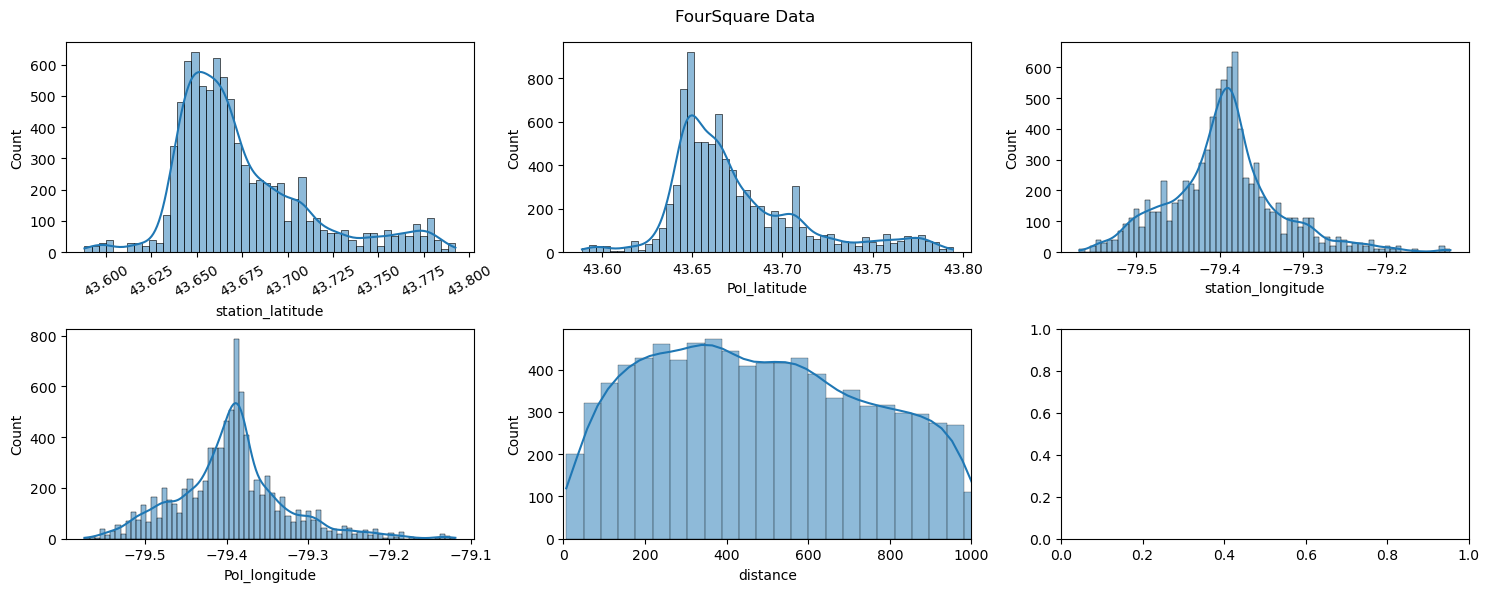

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
fig.suptitle('FourSquare Data')

sns.histplot(ax=axes[0,0], data=fs_bikes, x='station_latitude', kde=True).tick_params(axis='x', rotation=30)
sns.histplot(ax=axes[0,1], data=fs_bikes, x='PoI_latitude', kde=True)
sns.histplot(ax=axes[0,2], data=fs_bikes, x='station_longitude', kde=True)
sns.histplot(ax=axes[1,0], data=fs_bikes, x='PoI_longitude', kde=True)
sns.histplot(ax=axes[1,1], data=fs_bikes, x='distance', kde=True).set_xlim([0, 1000])


fig.tight_layout()

plt.show()

fig.savefig('../images/fs_bikes_hist.svg')

+ The info graphed

In [8]:
# Here I'm getting a total of how many times each category shows up
dict = {}
for i in range(6):
    dict[f'cat{i}'] = fs_bikes[f'category{i}'].value_counts() 
    
fs_cats = pd.DataFrame(dict).sort_values(by='cat0', ascending=False)

# Since the order that each category can be in for each venue can be arbitrary, I'm adding them all together
fs_cats = fs_cats.fillna(0)                                                                                         
fs_cats['total'] = fs_cats['cat0']+fs_cats['cat1']+fs_cats['cat2']+fs_cats['cat3']+fs_cats['cat4']+fs_cats['cat5']
fs_cats

,cat0,cat1,cat2,cat3,cat4,cat5,total
Park,691.0,27.0,0.0,0.0,0.0,0.0,718.0
Café,579.0,75.0,28.0,0.0,0.0,0.0,682.0
Bar,427.0,35.0,0.0,0.0,0.0,0.0,462.0
Pizzeria,418.0,51.0,3.0,0.0,0.0,0.0,472.0
Bakery,333.0,32.0,0.0,0.0,0.0,0.0,365.0
...,...,...,...,...,...,...,...
Venezuelan Restaurant,0.0,0.0,13.0,0.0,0.0,0.0,13.0
Vintage and Thrift Store,0.0,2.0,0.0,0.0,0.0,0.0,2.0
Waterfront,0.0,2.0,0.0,0.0,0.0,0.0,2.0
Whisky Bar,0.0,4.0,0.0,0.0,0.0,0.0,4.0


Bike stations seem to be very closely spaced to some categories like parks. This can be due to many different reasons, so nothing can be drawn from just this

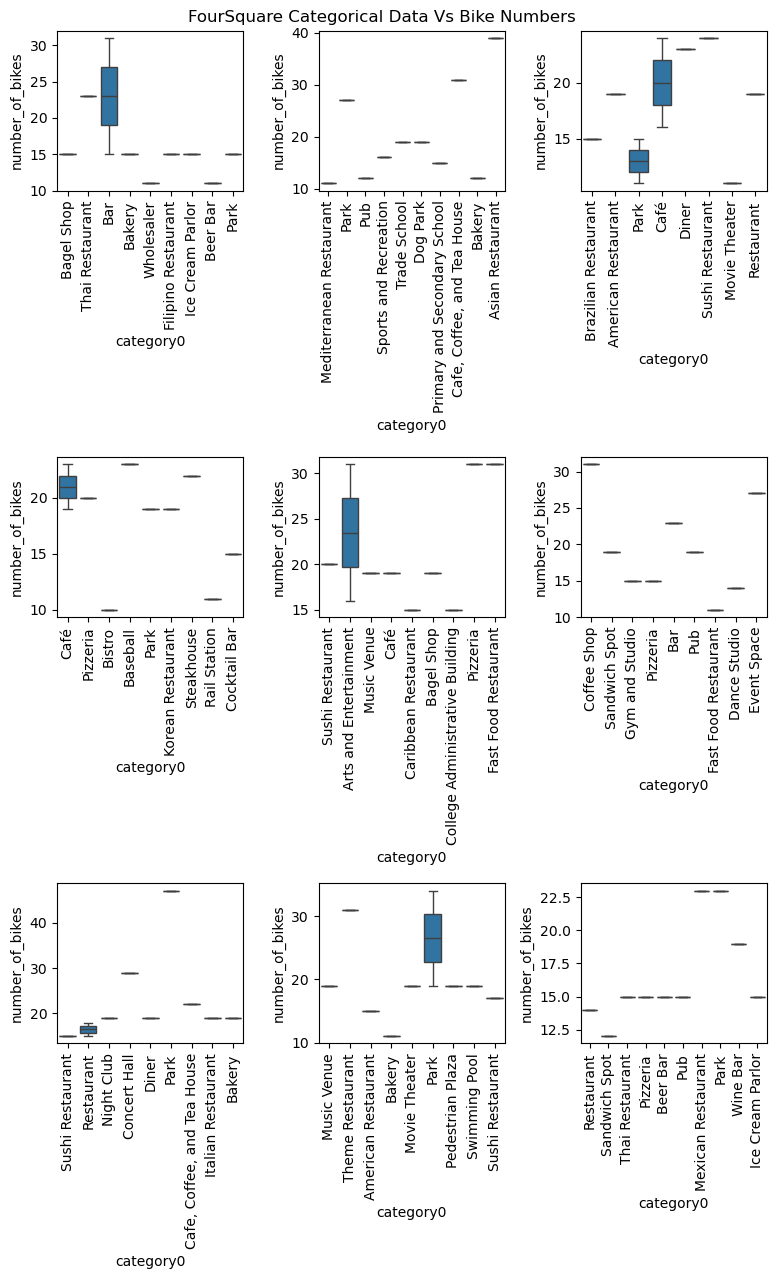

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(8, 13))
fig.suptitle('FourSquare Categorical Data Vs Bike Numbers')


for i in range(3):
    fs_cat_corr = fs_bikes['category0'].astype('str').sample(n=10)
    sns.boxplot(ax=axes[0,i], data=fs_bikes, x=fs_cat_corr, y='number_of_bikes').tick_params(axis='x', rotation=90)

for i in range(3):
    fs_cat_corr = fs_bikes['category0'].astype('str').sample(n=10)
    sns.boxplot(ax=axes[1,i], data=fs_bikes, x=fs_cat_corr, y='number_of_bikes').tick_params(axis='x', rotation=90)

for i in range(3):
    fs_cat_corr = fs_bikes['category0'].astype('str').sample(n=10)
    sns.boxplot(ax=axes[2,i], data=fs_bikes, x=fs_cat_corr, y='number_of_bikes').tick_params(axis='x', rotation=90)

plt.tight_layout()

fig.savefig('../images/fs_bikes_cats.svg')

Since there are so many different categories, I wanted a quick way to visualise the variance between them, so I graphed random samples of categories vs. the number of bikes. Here we can see that there is a pretty large variance between some categories, while others are closer.

In [10]:
stat, p_value = st.kruskal(*[group["number_of_bikes"].values for category, group in fs_bikes.groupby("category0", observed=True)])
print('FourSquare Kruskal-Wallis Test:')
print(f"Kruskal-Wallis Test statistic: {stat}")
print(f"P-value: {p_value}")

FourSquare Kruskal-Wallis Test:
Kruskal-Wallis Test statistic: 460.5321946051755
P-value: 1.7008126362216424e-16


I ran a Kruskal-Wallis test since the sample sizes for each category was different. From the result here, we can confirm what we saw in the boxplots that there is a stastically significant difference in the number of bikes around each point of interest. We can't infer why that is from these results alone though.

#### Yelp

In [11]:
yelp_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   station_id         8640 non-null   object  
 1   station_name       8640 non-null   object  
 2   station_latitude   8640 non-null   float64 
 3   station_longitude  8640 non-null   float64 
 4   number_of_bikes    8640 non-null   int64   
 5   yelp_id            8640 non-null   object  
 6   PoI_name           8640 non-null   object  
 7   review_count       8640 non-null   int64   
 8   rating             8640 non-null   float64 
 9   price              8640 non-null   category
 10  distance           8640 non-null   float64 
 11  PoI_latitude       8640 non-null   float64 
 12  PoI_longitude      8640 non-null   float64 
 13  address            8639 non-null   object  
 14  postal_code        8640 non-null   object  
 15  category0          8640 non-null   category
 16  catego

Again, the join looks good

In [12]:
yelp_bikes.describe()

,station_latitude,station_longitude,number_of_bikes,review_count,rating,distance,PoI_latitude,PoI_longitude
count,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8.640000e+03,8640.000000,8640.000000
mean,43.674239,-79.394581,19.310185,291.910880,4.096192,7.237819e+02,43.674326,-79.394734
std,0.036858,0.066307,7.301240,517.603457,0.458456,5.519651e+02,0.036736,0.065389
min,43.588077,-79.568250,7.000000,0.000000,0.000000,1.023678e-09,43.591788,-79.574220
25%,43.649330,-79.432465,15.000000,63.000000,3.900000,2.410073e+02,43.649718,-79.430095
50%,43.664024,-79.394621,19.000000,145.000000,4.100000,5.620576e+02,43.664170,-79.395840
75%,43.690312,-79.364703,23.000000,340.000000,4.400000,1.198360e+03,43.685862,-79.368461
max,43.792363,-79.123184,63.000000,3787.000000,5.000000,7.613918e+03,43.798663,-79.122154


In [13]:
# Matplotlib uses '$' as a special charcter, so to graph 'price' I had to turn the values into strings and add escape characters 
prices_string = yelp_bikes['price'].astype(str).replace('$','\\$')
prices_string = prices_string.replace('$$','\\$\\$')
prices_string = prices_string.replace('$$$','\\$\\$\\$')
prices_string = prices_string.replace('$$$$','\\$\\$\\$\\$')
prices_string = prices_string.sort_values()

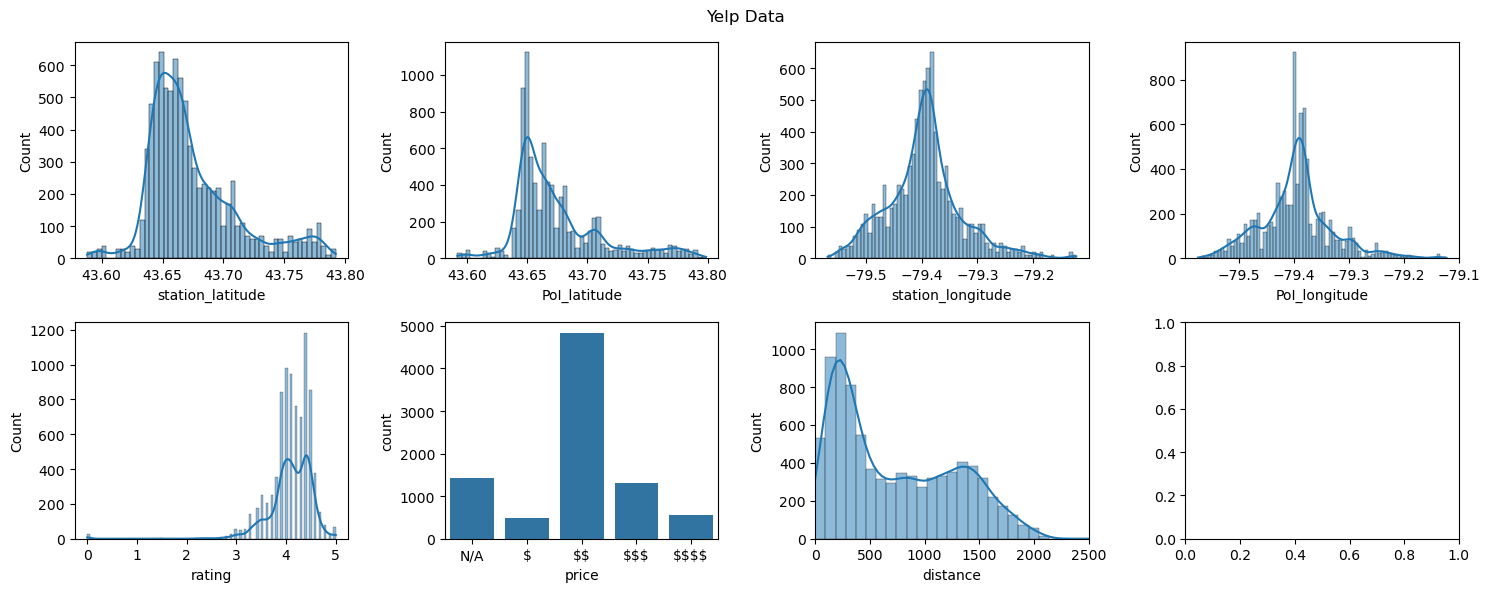

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
fig.suptitle('Yelp Data')

sns.histplot(ax=axes[0,0], data=yelp_bikes, x='station_latitude', kde=True)
sns.histplot(ax=axes[0,1], data=yelp_bikes, x='PoI_latitude', kde=True)
sns.histplot(ax=axes[0,2], data=yelp_bikes, x='station_longitude', kde=True)
sns.histplot(ax=axes[0,3], data=yelp_bikes, x='PoI_longitude', kde=True)
sns.histplot(ax=axes[1,0], data=yelp_bikes, x='rating', kde=True)
sns.countplot(ax=axes[1,1], x=prices_string)
sns.histplot(ax=axes[1,2], data=yelp_bikes, x='distance', kde=True).set_xlim([0, 2500])



fig.tight_layout()

plt.show()

fig.savefig('../images/yelp_bikes_hist.svg')

We can see some intriguing data here. Ratings seems to have a multimodal distribution, and we can see that the Yelp API clearly only uses radius as a suggestion

In [15]:
dict = {}
for i in range(4):
    dict[f'cat{i}'] = yelp_bikes[f'category{i}'].value_counts() 

yelp_cats = pd.DataFrame(dict).sort_values(by='cat0', ascending=False)

yelp_cats = yelp_cats.fillna(0)
yelp_cats['total'] = yelp_cats['cat0']+yelp_cats['cat1']+yelp_cats['cat2']+yelp_cats['cat3']
yelp_cats

,cat0,cat1,cat2,cat3,total
Japanese,702.0,110.0,4.0,0.0,816.0
Italian,634.0,234.0,34.0,0.0,902.0
Canadian (New),533.0,206.0,78.0,0.0,817.0
Thai,500.0,30.0,9.0,0.0,539.0
French,308.0,86.0,10.0,0.0,404.0
...,...,...,...,...,...
Team Building Activities,0.0,1.0,9.0,0.0,10.0
Toy Stores,0.0,0.0,3.0,0.0,3.0
Wineries,0.0,2.0,0.0,0.0,2.0
Yoga,0.0,1.0,0.0,0.0,1.0


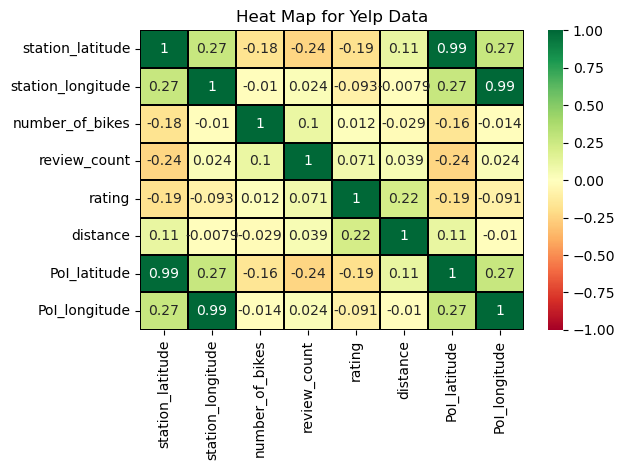

In [16]:
ax = sns.heatmap(yelp_bikes.select_dtypes(exclude=['category', 'object']).corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True, linewidth=.1, linecolor="black")
ax.set(title='Heat Map for Yelp Data')

plt.tight_layout()

plt.savefig('../images/yelp_heatmap.svg')
plt.show()

The only line that matters here is for the `number_of_bikes`. We can see that `review_count` seems to have the highest correlation to it.

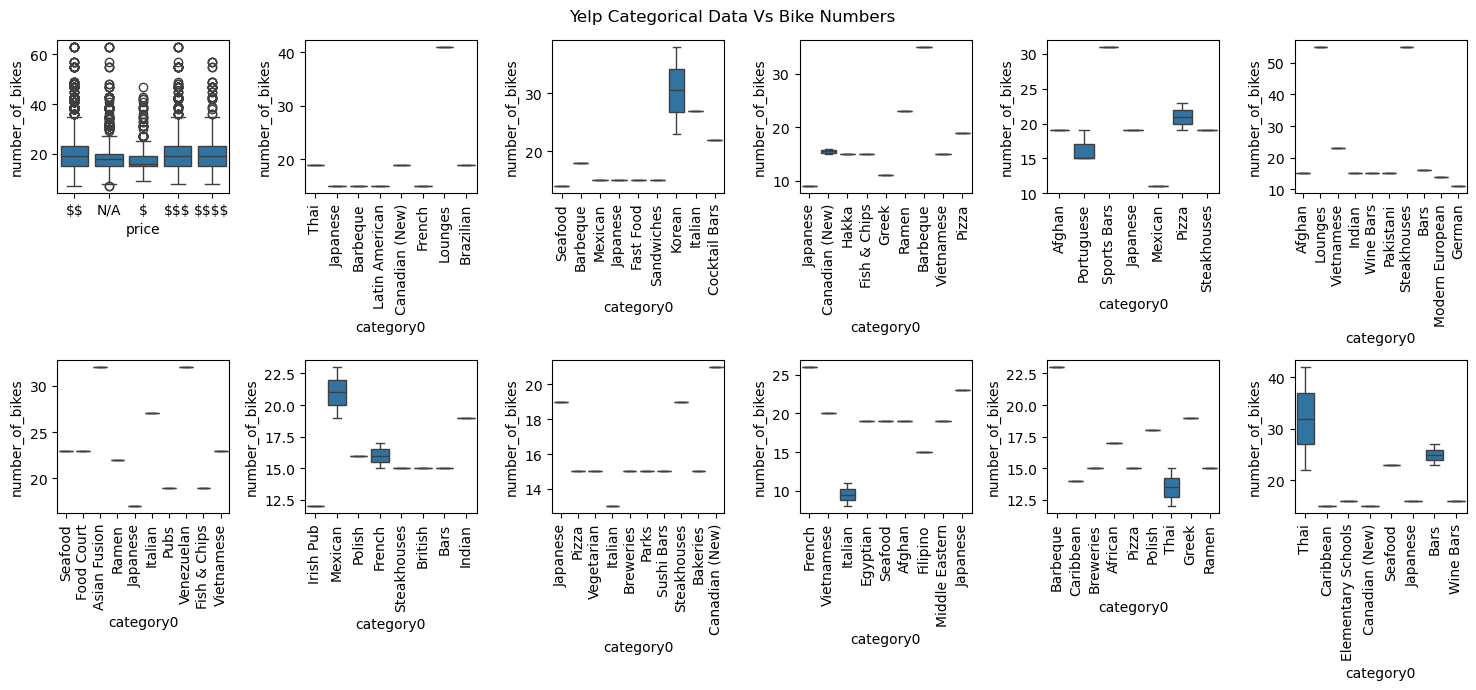

In [17]:
fig, axes = plt.subplots(2, 6, figsize=(15, 7))
fig.suptitle('Yelp Categorical Data Vs Bike Numbers')

sns.boxplot(ax=axes[0,0], data=yelp_bikes, x=prices_string, y='number_of_bikes')

for i in range(1,6):
    yelp_cat_corr = yelp_bikes['category0'].astype('str').sample(n=10)
    sns.boxplot(ax=axes[0,i], data=yelp_bikes, x=yelp_cat_corr, y='number_of_bikes').tick_params(axis='x', rotation=90)
    
for i in range(6):
    yelp_cat_corr = yelp_bikes['category0'].astype('str').sample(n=10)
    sns.boxplot(ax=axes[1,i], data=yelp_bikes, x=yelp_cat_corr, y='number_of_bikes').tick_params(axis='x', rotation=90)


plt.tight_layout()

fig.savefig('../images/yelp_bikes_cats.svg')

Just like with the FourSquare data, there's a lot of variance between the categories. `price` doesn't seem to have much variance, but has lots of outliers

In [18]:
stat, p_value = st.kruskal(*[group["number_of_bikes"].values for category, group in yelp_bikes.groupby("category0", observed=True)])
print('Yelp Kruskal-Wallis Test:')
print(f"Kruskal-Wallis Test statistic: {stat}")
print(f"P-value: {p_value}")

Yelp Kruskal-Wallis Test:
Kruskal-Wallis Test statistic: 315.38964693855405
P-value: 4.246332521939276e-09


The Kruskal-Wallis test confirms that there is a difference between the categories

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

To prevent duplication and to normalise the database, I removed the station info from the `fs_data` and `yelp_data` tables. This allowed me to remove points of interest that might have been in the vicinity of multiple bike stations. So that the information could still be related, I created a linking table for each that matched the bike stations to the PoIs by them.

In [19]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [20]:
connection = create_connection("../data/toronto_bikes_database.sqlite")

Connection to SQLite DB successful


In [21]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [22]:
create_bike_stations_table = '''
    CREATE TABLE bike_stations(
    station_id varchar NOT NULL PRIMARY KEY,
    station_name varchar,
    station_latitude float,
    station_longitude float,
    number_of_bikes int
);
'''

In [23]:
execute_query(connection, create_bike_stations_table)

Query executed successfully


In [24]:
create_fs_poi_table = """
CREATE TABLE foursquare_poi(
  fsq_id varchar NOT NULL PRIMARY KEY,
  distance float,
  PoI_name varchar,
  PoI_latitude float,
  PoI_longitude float,
  address varchar,
  postal_code varchar,
  category0 varchar,
  category1 varchar,
  category2 varchar,
  category3 varchar,
  category4 varchar,
  category5 varchar
);
"""

In [25]:
execute_query(connection, create_fs_poi_table)

Query executed successfully


In [26]:
create_yelp_poi_table = """
CREATE TABLE yelp_poi(
  yelp_id varchar NOT NULL PRIMARY KEY,
  PoI_name varchar,
  review_count int,
  rating float,
  price varchar,
  distance float,
  PoI_latitude float,
  PoI_longitude float,
  address varchar,
  postal_code varchar,
  category0 varchar,
  category1 varchar,
  category2 varchar,
  category3 varchar
);
"""

In [27]:
execute_query(connection, create_yelp_poi_table)

Query executed successfully


In [28]:
create_fs_station_table = """
CREATE TABLE foursquare_stations(
  fsq_id varchar,
  station_id varchar,
  FOREIGN KEY (station_id) REFERENCES bike_stations (station_id),
  FOREIGN KEY (fsq_id) REFERENCES foursquare_poi (fsq_id),
  PRIMARY KEY (fsq_id, station_id)
);
"""

In [29]:
execute_query(connection, create_fs_station_table)

Query executed successfully


In [30]:
create_yelp_station_table = """
CREATE TABLE yelp_stations(
  yelp_id varchar,
  station_id varchar,
  FOREIGN KEY (station_id) REFERENCES bike_stations (station_id)
  FOREIGN KEY (yelp_id) REFERENCES yelp_poi (yelp_id)
  PRIMARY KEY (yelp_id, station_id)
);
"""

In [31]:
execute_query(connection, create_yelp_station_table)

Query executed successfully


In [32]:
bike_stations.to_sql('bike_stations', connection, if_exists='append', index=False)

864

In [33]:
# dropping duplicates to satisfy the primary key constraint, and dropping stations since it is not transitive of the PK
fs_sql = fs_data.drop_duplicates(subset='fsq_id').drop(columns='station_id')
fs_sql.to_sql('foursquare_poi', connection, if_exists='append', index=False)

2123

In [34]:
# same thing for yelp_data
yelp_sql = yelp_data.drop_duplicates(subset='yelp_id').drop(columns='station_id')
yelp_sql.to_sql('yelp_poi', connection, if_exists='append', index=False)

1600

In [35]:
# creating the dataframe to insert into the linking tables
drop_fs_sql = list(fs_data.columns)
drop_fs_sql.remove('fsq_id')
drop_fs_sql.remove('station_id')
fs_stations_sql = fs_data.drop(columns=drop_fs_sql)
fs_stations_sql.to_sql('foursquare_stations', connection, if_exists='append', index=False)

8640

In [36]:
drop_yelp_sql = list(yelp_data.columns)
drop_yelp_sql.remove('yelp_id')
drop_yelp_sql.remove('station_id')
yelp_stations_sql = yelp_data.drop(columns=drop_yelp_sql)
yelp_stations_sql.to_sql('yelp_stations', connection, if_exists='append', index=False)

8640

These queries are to confirm that the database was created correctly by extracting the data back into a dataframe.

+ The master schema table for my database

In [37]:
pd.read_sql_query("SELECT * from sqlite_master", connection)

,type,name,tbl_name,rootpage,sql
0,table,bike_stations,bike_stations,2,CREATE TABLE bike_stations(\n station_id va...
1,index,sqlite_autoindex_bike_stations_1,bike_stations,3,None
2,table,foursquare_poi,foursquare_poi,4,CREATE TABLE foursquare_poi(\n fsq_id varchar...
3,index,sqlite_autoindex_foursquare_poi_1,foursquare_poi,5,None
4,table,yelp_poi,yelp_poi,6,CREATE TABLE yelp_poi(\n yelp_id varchar NOT ...
5,index,sqlite_autoindex_yelp_poi_1,yelp_poi,7,None
6,table,foursquare_stations,foursquare_stations,8,CREATE TABLE foursquare_stations(\n fsq_id va...
7,index,sqlite_autoindex_foursquare_stations_1,foursquare_stations,9,None
8,table,yelp_stations,yelp_stations,10,CREATE TABLE yelp_stations(\n yelp_id varchar...
9,index,sqlite_autoindex_yelp_stations_1,yelp_stations,11,None


+ bike_stations

In [38]:
pd.read_sql_query("SELECT * from bike_stations", connection)

,station_id,station_name,station_latitude,station_longitude,number_of_bikes
0,009f180cf35ae1285733d98ccf058313,Summerhill Ave / Maclennan Ave,43.685924,-79.376304,11
1,010507feed5b8d87c40cd95933ed5654,Queen St E / Joseph Duggan Rd,43.667763,-79.308117,19
2,0153756b9e136b96e730aaa2f048227f,Victoria Park Ave / Danforth Ave,43.691468,-79.288619,19
3,019e5937c3fc120cee906770bca8fa69,Navy Wharf Crt / Bremner Blvd,43.640722,-79.391051,9
4,01caf8b12874b091f2fccc3818e3c72e,420 Wellington St W,43.643834,-79.396649,14
...,...,...,...,...,...
859,fe806cf907683c67f4d2899eb4123f00,457 King St W,43.645209,-79.396074,19
860,fe97ae335b31b6c455f340f397904d38,Danforth Ave / Coxwell Ave,43.683378,-79.322961,15
861,fea3f9dfbcc18225728f10913c5d3d5b,Bloor St W / Brock Ave,43.658988,-79.438715,11
862,ffc954e6f4228f59169c040483ebcc3a,Wells Hill Ave / St Clair Ave W,43.683351,-79.415620,15


+ foursquare_poi

In [39]:
pd.read_sql_query("SELECT * from foursquare_poi", connection)

,fsq_id,distance,PoI_name,PoI_latitude,PoI_longitude,address,postal_code,category0,category1,category2,category3,category4,category5
0,4ae48f90f964a520ad9b21e3,470.0,Chorley Park,43.687377,-79.370803,250 Douglas Dr,M4W 2C1,Park,N/A,N/A,N/A,N/A,N/A
1,4dfe2ca5185009bba4df0608,905.0,The Don Valley Brick Works Park,43.684526,-79.365204,550 Bayview Ave,M4W 3X8,Park,N/A,N/A,N/A,N/A,N/A
2,4bf031dcf831c928eab401f2,960.0,David A. Balfour Park,43.685607,-79.388253,200 Mount Pleasant Rd,M4T 2C4,Park,Sports and Recreation,N/A,N/A,N/A,N/A
3,4dfe2d6d185009bba4df0672,906.0,Moore Park Ravine,43.693691,-79.379762,205 Moore Ave,M4T 2K7,Park,Sports and Recreation,N/A,N/A,N/A,N/A
4,4bc0d290920eb713dda1192c,984.0,Rosehill Reservoir,43.686260,-79.388544,75 Rosehill Ave,None,Park,N/A,N/A,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,617dff47a4414d394308b6d6,180.0,Sweet Spot Desserts,43.753394,-79.253265,2883 Lawrence Ave E,M1P 2S8,Dessert Shop,Restaurant,N/A,N/A,N/A,N/A
2119,63f2b54dbbe98372bad10187,188.0,Paandiyan Restaurant,43.752537,-79.254255,799 Brimley Rd,M1J 1C9,Sri Lankan Restaurant,N/A,N/A,N/A,N/A,N/A
2120,348adbe307fd4e93bd452a2c,242.0,East Side Players,43.686396,-79.360308,67 Pottery Rd,M4K 2B9,Music Venue,N/A,N/A,N/A,N/A,N/A
2121,540cc103498ee75cf34b89fc,393.0,Ho Ho BBQ,43.686465,-79.357793,3833 Midland Ave,M1V 5L6,BBQ Joint,N/A,N/A,N/A,N/A,N/A


+ yelp_poi

In [40]:
pd.read_sql_query("SELECT * from yelp_poi", connection)

,yelp_id,PoI_name,review_count,rating,price,distance,PoI_latitude,PoI_longitude,address,postal_code,category0,category1,category2,category3
0,GO3d6vQBfByJN93Hco4dOQ,Megumi Mazesoba,37,4.6,$$,1293.173257,43.688760,-79.391960,46 Saint Clair Avenue E,M4T 1M9,Japanese,N/A,N/A,N/A
1,uGLAEGqeJa4jtP1Io0sOrg,Mineral,35,4.5,N/A,1402.327352,43.677630,-79.389470,1027 Yonge Street,M4W 2K9,Noodles,Seafood,Asian Fusion,N/A
2,lDpVyjENOz_qbxbRoyBi8w,Black Camel,399,4.4,$,1426.509564,43.677122,-79.389210,4 Crescent Road,M4W 1S9,Sandwiches,N/A,N/A,N/A
3,RqOgBMpKYdsEOmBVmFXe3g,RYUS Noodle Bar,411,4.0,$$,1701.034869,43.677100,-79.359050,786 Broadview Avenue,M4K 2P7,Ramen,N/A,N/A,N/A
4,v1hfGBkWhDHIdRIfMJtp5A,Dolce Bakery,10,4.3,N/A,25.138820,43.686170,-79.376090,420 Summerhill Avenue,M4W 2E4,Bakeries,Desserts,Pizza,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Q62lGVKqoKJ09lZNt2qpfw,Lucky Chinese Restaurant,109,3.6,$$,715.824851,43.752170,-79.263830,2650 Lawrence Avenue E,M1P 2S1,Hakka,N/A,N/A,N/A
1596,l03n2u_1pV7R8RHsjtobpw,Amazing Shawarma,9,4.3,N/A,715.824851,43.752170,-79.263830,2650 Lawrence Avenue E,M1P 2S1,Middle Eastern,Burgers,Falafel,N/A
1597,HML9ElO3X20nYOX_l8mwBg,Al Madina Halal Pizza & Bakery,10,4.3,$$,560.875315,43.751697,-79.261476,2683 Lawrence Ave E,M1P 2S2,Pizza,N/A,N/A,N/A
1598,Ua9C6dez2UnJlFUoq5-I5A,Scarborough Ribfest,14,3.7,N/A,439.716354,43.757953,-79.256186,1005 Brimley Road,M1P 4N7,Festivals,N/A,N/A,N/A


+ foursquare_stations 

In [41]:
pd.read_sql_query("SELECT * from foursquare_stations", connection)

,fsq_id,station_id
0,4ae48f90f964a520ad9b21e3,009f180cf35ae1285733d98ccf058313
1,4dfe2ca5185009bba4df0608,009f180cf35ae1285733d98ccf058313
2,4bf031dcf831c928eab401f2,009f180cf35ae1285733d98ccf058313
3,4dfe2d6d185009bba4df0672,009f180cf35ae1285733d98ccf058313
4,4bc0d290920eb713dda1192c,009f180cf35ae1285733d98ccf058313
...,...,...
8635,4ad4c061f964a520b3f720e3,ffeaa2aaedeb18fc11f708bcd8323149
8636,4adc9148f964a520512d21e3,ffeaa2aaedeb18fc11f708bcd8323149
8637,55a9bbf9498e00ffd7f4c71f,ffeaa2aaedeb18fc11f708bcd8323149
8638,4adbbae6f964a520402a21e3,ffeaa2aaedeb18fc11f708bcd8323149


+ yelp_stations

In [42]:
pd.read_sql_query("SELECT * from yelp_stations", connection)

,yelp_id,station_id
0,GO3d6vQBfByJN93Hco4dOQ,009f180cf35ae1285733d98ccf058313
1,uGLAEGqeJa4jtP1Io0sOrg,009f180cf35ae1285733d98ccf058313
2,lDpVyjENOz_qbxbRoyBi8w,009f180cf35ae1285733d98ccf058313
3,RqOgBMpKYdsEOmBVmFXe3g,009f180cf35ae1285733d98ccf058313
4,v1hfGBkWhDHIdRIfMJtp5A,009f180cf35ae1285733d98ccf058313
...,...,...
8635,6eRSdODyj9GS0w6zlhrWkg,ffeaa2aaedeb18fc11f708bcd8323149
8636,7ODXq--HE7QpzvWwgk5rMA,ffeaa2aaedeb18fc11f708bcd8323149
8637,wpQsmMvdhefqIlxvRt_Jbg,ffeaa2aaedeb18fc11f708bcd8323149
8638,mZRKH9ngRY92bI_irrHq6w,ffeaa2aaedeb18fc11f708bcd8323149
